In [1]:
from theta.rtbm import RTBM
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ndim = 3
nhid = 1
rtbm = RTBM(ndim, nhid, 
            init_max_param_bound=50, 
            random_bound=2, 
            positive_T=True, 
            positive_Q=True
           )

def espacio(sample, n=int(1e5)):
    u = np.max(sample)
    l = np.min(sample)
    epsilon = np.abs(u)/4.0
    u += epsilon
    l -= epsilon
    r = np.random.rand(ndim, n)
    return l + r*(u-l), pow(u-l, ndim)/n

In [3]:
# Sample after random initialization
nevt = int(1e3)
xrand, _ = rtbm.make_sample(nevt)
jac = rtbm(xrand.T)

Dimension: 1


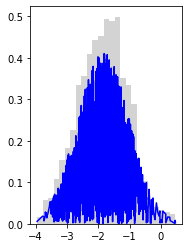

Dimension: 2


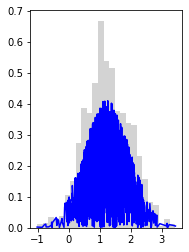

Dimension: 3


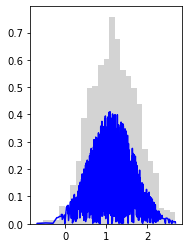

In [4]:
for d in range(ndim):
    print(f"Dimension: {d+1}")
    plt.subplot(1,2,1)
    x = sorted(xrand[:,d])
    y = [i for _, i in sorted(zip(xrand[:,d], jac[0]))]
    plt.plot(x, y, color="blue", label=f"p(x_{d+1})")
    plt.hist(xrand[:, d], bins=25, density=True, color="lightgray", label="Sample")
    plt.show()

In [5]:
r, jac = espacio(xrand)
aa = rtbm(r)
print(np.sum(aa)*jac)

1.0180511027346077
